In [16]:
!pip install pandas unidecode wordcloud sklearn nltk tqdm gensim annoy

In [17]:
!pip install spanish_sentiment_analysis

In [18]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# progress bars 
from tqdm.notebook import tqdm
tqdm.pandas()

# text manipulation
from unidecode import unidecode
import re
import string
import nltk
nltk.download('punkt')

# gensim - for training embedding models
import gensim
import gensim.similarities.index
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# topic modeling, etc
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering, KMeans

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
from classifier import *

In [81]:
import seaborn as sns

In [20]:
def get_twitter_df():
    manifest = pd.read_csv(
        'https://raw.githubusercontent.com/cdcmx2020a/group_a_twitter/master/processed_json/manifest.txt',
        header=None,
        names=['jsons'])['jsons'].tolist()
    df = pd.concat(
        [pd.read_json(f'https://github.com/cdcmx2020a/group_a_twitter/blob/master/processed_json/{f}?raw=true', lines=True) 
            for f in tqdm(manifest)],
        axis=0
    )
    # df = df.query('date > 60')
    return df 

In [21]:
tweets_es = get_twitter_df().query('lang == "es"')

In [8]:
tweets_es.head(1)

,full_text,lat,lon,date,hashtags,place_type,place_name,country,favorites,retweets,lang
5,7 consejos para que las marcas afronten la cri...,NaN,NaN,78,[],None,None,None,11,3,es


In [22]:
tweets_es=tweets_es.query('country=="MX"').sort_values('date')

In [23]:
clf = SentimentClassifier()

In [24]:
tweets_es=tweets_es[['full_text', 'date', 'place_name', 'favorites', 'retweets']]

In [25]:
sentiment=tweets_es[['full_text', 'date', 'retweets']]

In [26]:
punctuation_chars = ["'", '"', ",", ".", "!", ":", ";", '#', '@']

def strip_punctuation(strr):
    for i in punctuation_chars:
        if i in strr:
            strr=strr.replace(i, "")
    return strr

In [27]:
sentiment['full_text']=sentiment['full_text'].apply(strip_punctuation)

In [28]:
sentiment['sentiment']=sentiment['full_text'].apply(clf.predict)

In [30]:
cases=pd.read_csv('/content/cases.csv')

In [31]:
cases=cases.drop(columns='Unnamed: 0')

In [32]:
cases=cases.set_index('date')

In [33]:
dic=cases.to_dict('dict')

In [34]:
dic=dic['cases']

In [35]:
sentiment['cases']=sentiment['date']

In [36]:
sentiment.cases=sentiment.cases.replace(dic)

In [63]:
month1=sentiment.query('date<=95')
month4=sentiment.query('date>=165')

In [70]:
m2=sentiment.query('date<=130')
month2=m2.query('date>95')

In [75]:
m3=sentiment.query('date<165')
month3=m3.query('date>130')

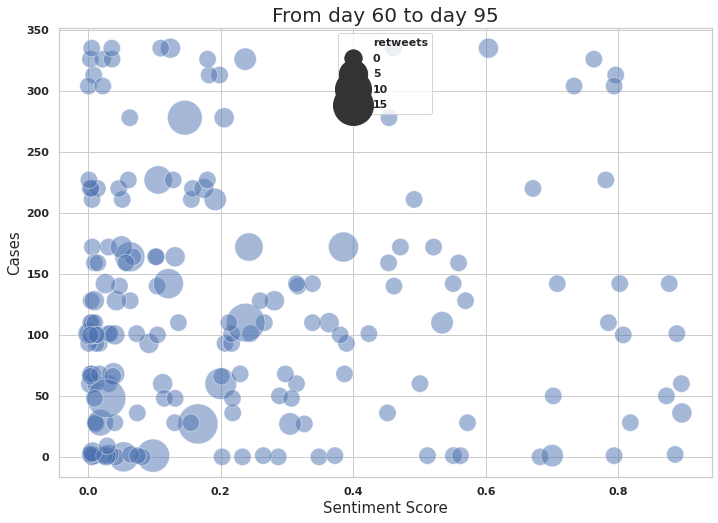

In [159]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
ax1 = sns.scatterplot(x=month1.sentiment, y=month1.cases,
                      size=month1.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
ax1.grid(True)
ax1.set_title('From day 60 to day 95',fontsize=20)
ax1.set_xlabel('Sentiment Score',fontsize=15)
ax1.set_ylabel("Cases",fontsize=15)
ax1.figure.savefig("month1.png")

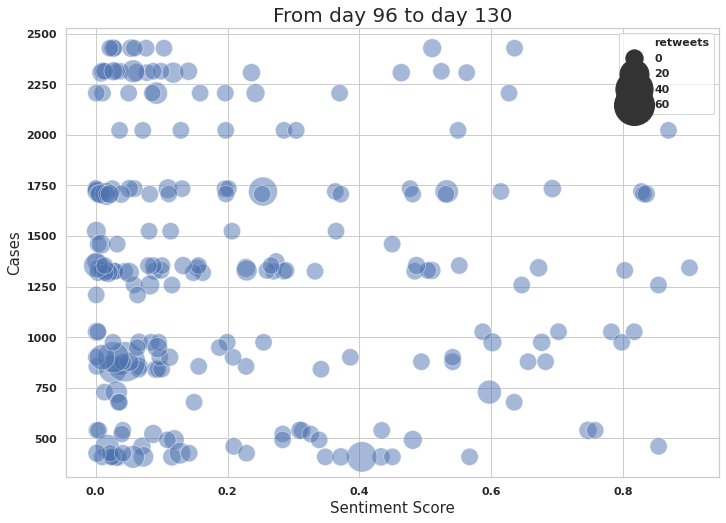

In [160]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
ax2 = sns.scatterplot(x=month2.sentiment, y=month2.cases,
                      size=month2.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
ax2.grid(True)
ax2.set_title('From day 96 to day 130',fontsize=20)
ax2.set_xlabel('Sentiment Score',fontsize=15)
ax2.set_ylabel("Cases",fontsize=15)
ax2.figure.savefig("month2.png")

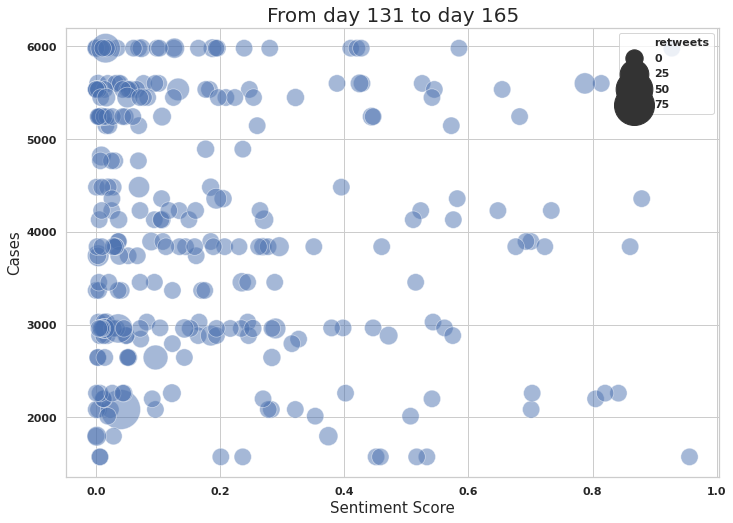

In [162]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
ax3 = sns.scatterplot(x=month3.sentiment, y=month3.cases,
                      size=month3.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
ax3.grid(True)
ax3.set_title('From day 131 to day 165',fontsize=20)
ax3.set_xlabel('Sentiment Score',fontsize=15)
ax3.set_ylabel("Cases",fontsize=15)
ax3.figure.savefig("month3.png")

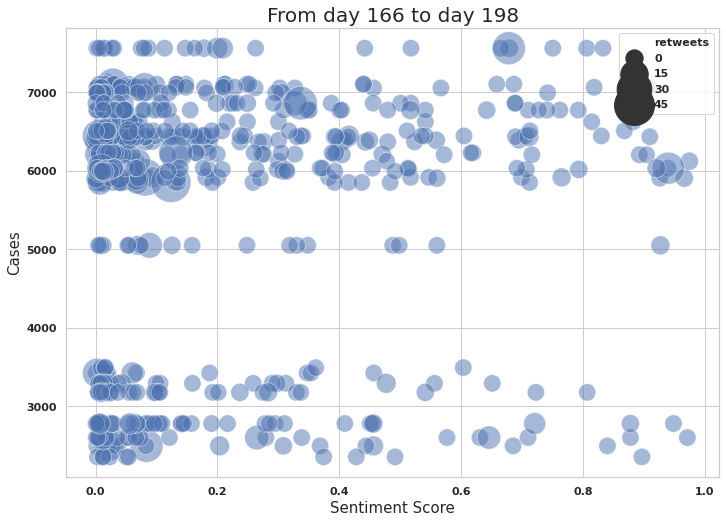

In [163]:
cmap = sns.cubehelix_palette(rot=.3, as_cmap=True, reverse=True)
ax4 = sns.scatterplot(x=month4.sentiment, y=month4.cases,
                      size=month4.retweets, alpha=0.5,
                      palette=cmap, sizes=(300, 1600),color='b')
ax4.grid(True)
ax4.set_title('From day 166 to day 198',fontsize=20)
ax4.set_xlabel('Sentiment Score',fontsize=15)
ax4.set_ylabel("Cases",fontsize=15)
ax4.figure.savefig("month4.png")